In [1]:
%matplotlib inline
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import xarray as xr

from matplotlib import colors 
import matplotlib.gridspec as gridspec
#import seaborn as sns

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from collections import namedtuple
from shapely import geometry

import scipy 
from scipy import stats, optimize, interpolate

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, cartopy, scipy

Software versions
Python 3.8.11 64bit [GCC 7.5.0]
IPython 7.27.0
OS Linux 4.18.0 372.19.1.el8_6.x86_64 x86_64 with glibc2.17
numpy 1.20.3
matplotlib 3.4.2
xarray 0.19.0
cartopy 0.18.0
scipy 1.7.1
Thu Sep 01 14:12:13 2022 CEST

# Cumsum data calculated here:
http://localhost:9000/lab/tree/parcels_Azores/eNATL60/local_gemini_notebooks/2022-01-20_CUMSUM_dist_degrees.ipynb
## --> edit
# Tot distance calculated here:
* dist_tot_km_monthly_nT.sh 
* dist_tot_km_monthly_wT.sh  

## Loading cumsum data:

In [3]:
filedir = '/storage/shared/oceanparcels/output_data/data_LauraGN/outputs_parcels/Azores/eNATL60/'

In [4]:
distance_Jul_nT = xr.open_dataset(filedir + 'dist_km_Jul_nT.nc')
distance_Aug_nT = xr.open_dataset(filedir + 'dist_km_Aug_nT.nc')
distance_Sep_nT = xr.open_dataset(filedir + 'dist_km_Sep_nT.nc')
distance_Oct_nT = xr.open_dataset(filedir + 'dist_km_Oct_nT.nc')
distance_Nov_nT = xr.open_dataset(filedir + 'dist_km_Nov_nT.nc')
distance_Dec_nT = xr.open_dataset(filedir + 'dist_km_Dec_nT.nc')
distance_Jan_nT = xr.open_dataset(filedir + 'dist_km_Jan_nT.nc')
distance_Feb_nT = xr.open_dataset(filedir + 'dist_km_Feb_nT.nc')
distance_Mar_nT = xr.open_dataset(filedir + 'dist_km_Mar_nT.nc')
distance_Apr_nT = xr.open_dataset(filedir + 'dist_km_Apr_nT.nc')
distance_May_nT = xr.open_dataset(filedir + 'dist_km_May_nT.nc')
distance_Jun_nT = xr.open_dataset(filedir + 'dist_km_Jun_nT.nc')


In [5]:
distance_Jul_wT = xr.open_dataset(filedir + 'dist_km_Jul_wT.nc')
distance_Aug_wT = xr.open_dataset(filedir + 'dist_km_Aug_wT.nc')
distance_Sep_wT = xr.open_dataset(filedir + 'dist_km_Sep_wT.nc')
distance_Oct_wT = xr.open_dataset(filedir + 'dist_km_Oct_wT.nc')
distance_Nov_wT = xr.open_dataset(filedir + 'dist_km_Nov_wT.nc')
distance_Dec_wT = xr.open_dataset(filedir + 'dist_km_Dec_wT.nc')
distance_Jan_wT = xr.open_dataset(filedir + 'dist_km_Jan_wT.nc')
distance_Feb_wT = xr.open_dataset(filedir + 'dist_km_Feb_wT.nc')
distance_Mar_wT = xr.open_dataset(filedir + 'dist_km_Mar_wT.nc')
distance_Apr_wT = xr.open_dataset(filedir + 'dist_km_Apr_wT.nc')
distance_May_wT = xr.open_dataset(filedir + 'dist_km_May_wT.nc')
distance_Jun_wT = xr.open_dataset(filedir + 'dist_km_Jun_wT.nc')


In [6]:
distance_Jul_wT

<xarray.Dataset>
Dimensions:  (traj: 106926, obs: 673)
Dimensions without coordinates: traj, obs
Data variables:
    lon      (traj, obs) float64 ...

# Calculating cumsum dist:

## Applying calculation:

In [16]:
cum_distance_nT = [distance_Jul_nT.to_array()[0].cumsum(dim='obs'), distance_Aug_nT.to_array()[0].cumsum(dim='obs'), distance_Sep_nT.to_array()[0].cumsum(dim='obs'), distance_Oct_nT.to_array()[0].cumsum(dim='obs'), distance_Nov_nT.to_array()[0].cumsum(dim='obs'), distance_Dec_nT.to_array()[0].cumsum(dim='obs'),
                   distance_Jan_nT.to_array()[0].cumsum(dim='obs'), distance_Feb_nT.to_array()[0].cumsum(dim='obs'), distance_Mar_nT.to_array()[0].cumsum(dim='obs'), distance_Apr_nT.to_array()[0].cumsum(dim='obs'), distance_May_nT.to_array()[0].cumsum(dim='obs'), distance_Jun_nT.to_array()[0].cumsum(dim='obs')]

In [17]:
cum_distance_wT = [distance_Jul_wT.to_array()[0].cumsum(dim='obs'), distance_Aug_wT.to_array()[0].cumsum(dim='obs'), distance_Sep_wT.to_array()[0].cumsum(dim='obs'), distance_Oct_wT.to_array()[0].cumsum(dim='obs'), distance_Nov_wT.to_array()[0].cumsum(dim='obs'), distance_Dec_wT.to_array()[0].cumsum(dim='obs'),
                   distance_Jan_wT.to_array()[0].cumsum(dim='obs'), distance_Feb_wT.to_array()[0].cumsum(dim='obs'), distance_Mar_wT.to_array()[0].cumsum(dim='obs'), distance_Apr_wT.to_array()[0].cumsum(dim='obs'), distance_May_wT.to_array()[0].cumsum(dim='obs'), distance_Jun_wT.to_array()[0].cumsum(dim='obs')]

## Loading tot_dist data:cumulative_integrate

In [19]:
filedir_t = '/storage/shared/oceanparcels/output_data/data_LauraGN/outputs_parcels/Azores/eNATL60/dist_tot_km/'

In [20]:
dist_tot_km_nT_Jul = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Jul.nc')
dist_tot_km_nT_Aug = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Aug.nc')
dist_tot_km_nT_Sep = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Sep.nc')
dist_tot_km_nT_Oct = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Oct.nc')
dist_tot_km_nT_Nov = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Nov.nc')
dist_tot_km_nT_Dec = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Dec.nc')
dist_tot_km_nT_Jan = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Jan.nc')
dist_tot_km_nT_Feb = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Feb.nc')
dist_tot_km_nT_Mar = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Mar.nc')
dist_tot_km_nT_Apr = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Apr.nc')
dist_tot_km_nT_May = xr.open_dataset(filedir_t + 'dist_tot_km_nT_May.nc')
dist_tot_km_nT_Jun = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Jun.nc')

In [21]:
dist_tot_km_wT_Jul = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Jul.nc')
dist_tot_km_wT_Aug = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Aug.nc')
dist_tot_km_wT_Sep = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Sep.nc')
dist_tot_km_wT_Oct = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Oct.nc')
dist_tot_km_wT_Nov = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Nov.nc')
dist_tot_km_wT_Dec = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Dec.nc')
dist_tot_km_wT_Jan = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Jan.nc')
dist_tot_km_wT_Feb = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Feb.nc')
dist_tot_km_wT_Mar = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Mar.nc')
dist_tot_km_wT_Apr = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Apr.nc')
dist_tot_km_wT_May = xr.open_dataset(filedir_t + 'dist_tot_km_wT_May.nc')
dist_tot_km_wT_Jun = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Jun.nc')


In [22]:
dist_tot_km_nT = [dist_tot_km_nT_Jul, dist_tot_km_nT_Aug, dist_tot_km_nT_Sep, dist_tot_km_nT_Oct, dist_tot_km_nT_Nov, dist_tot_km_nT_Dec, 
                  dist_tot_km_nT_Jan, dist_tot_km_nT_Feb, dist_tot_km_nT_Mar, dist_tot_km_nT_Apr, dist_tot_km_nT_May, dist_tot_km_nT_Jun]

In [23]:
dist_tot_km_wT = [dist_tot_km_wT_Jul, dist_tot_km_wT_Aug, dist_tot_km_wT_Sep, dist_tot_km_wT_Oct, dist_tot_km_wT_Nov, dist_tot_km_wT_Dec, 
                  dist_tot_km_wT_Jan, dist_tot_km_wT_Feb, dist_tot_km_wT_Mar, dist_tot_km_wT_Apr, dist_tot_km_wT_May, dist_tot_km_wT_Jun]

# Boxplot:

In [24]:
width = 0.35  # the width of the bars
labels = ['Jul. 2009', 'Aug. 2009', 'Sep. 2009', 'Oct. 2009', 'Nov. 2009', 'Dec. 2009', 'Jan. 2010', 'Feb. 2010', 'Mar. 2010', 'Apr. 2010', 'May. 2010', 'Jun. 2010'] 
x = np.arange(len(labels))  # the label locations


In [25]:
dist_cum_a = []
dist_cum_b = []

for ii in range(0, len(labels)):
    aa = ((cum_distance_nT[ii].max(dim='obs')).where(cum_distance_nT[ii].max(dim='obs') != 0., drop=True)).data
    dist_cum_a.append(aa) #= (distance_nT[ii].max(dim='obs')).where(distance_nT[ii].max(dim='obs') != 0., drop=True)
    bb = ((cum_distance_wT[ii].max(dim='obs')).where(cum_distance_wT[ii].max(dim='obs') != 0., drop=True)).data
    dist_cum_b.append(bb) 
    

In [29]:
dist_tot_nT = []
dist_tot_wT = []

for ii in range(0, len(labels)):
    aa = (dist_tot_km_nT[ii].lon.where(dist_tot_km_nT[ii].lon!=0, drop=True)).data
    dist_tot_nT.append(aa) 
    bb = (dist_tot_km_wT[ii].lon.where(dist_tot_km_wT[ii].lon!=0, drop=True)).data
    dist_tot_wT.append(bb) 

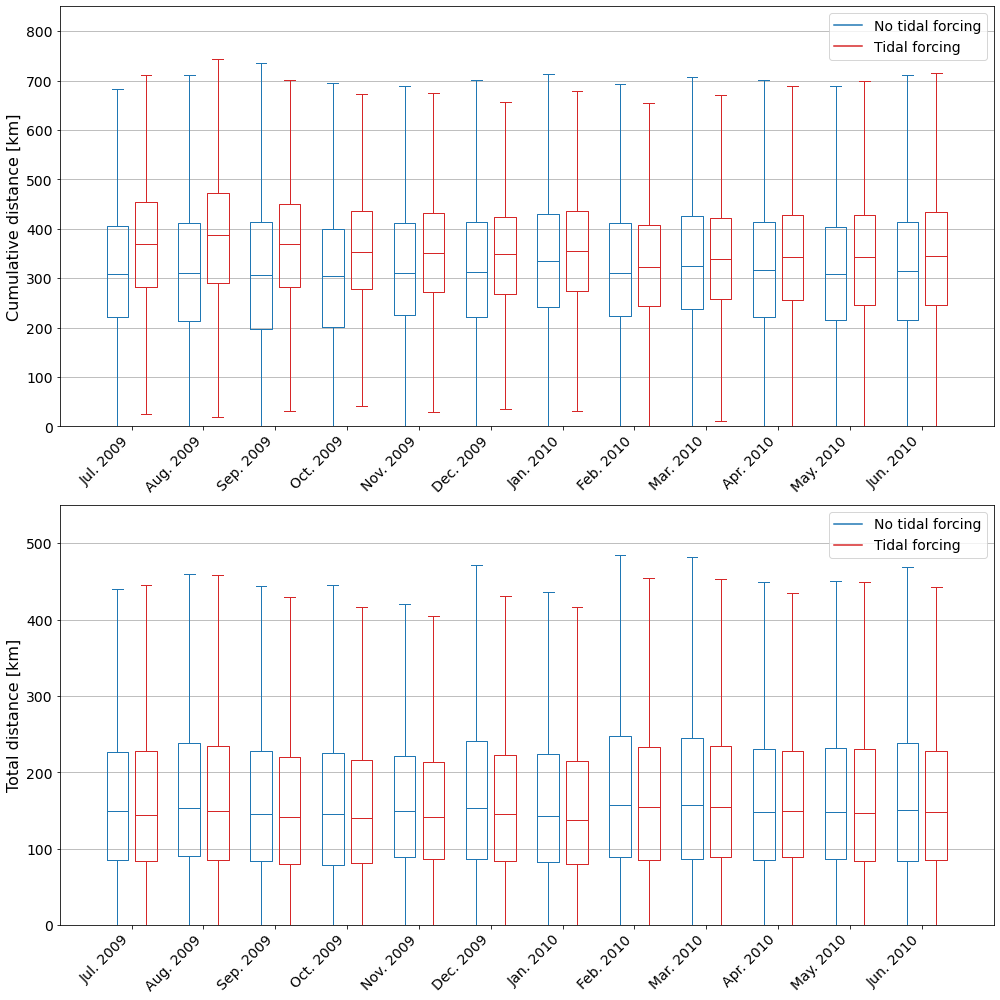

In [37]:
ticks = labels

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
#     plt.setp(bp['facecolor'], color=color)

plt.figure(figsize=(14,14))
ax1 = plt.subplot(211)

bpl = ax1.boxplot(dist_cum_a, positions=np.array(range(len(dist_cum_a)))*2.0-0.4, sym='', widths=0.6)
bpr = ax1.boxplot(dist_cum_b, positions=np.array(range(len(dist_cum_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, 'C0') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'C3')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='C0', label='No tidal forcing')
plt.plot([], c='C3', label='Tidal forcing')
plt.legend(fontsize=14)
# ax.legend(fontsize=14)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 850)
ax1.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# plt.grid()
ax1.yaxis.grid()
ax1.set_ylabel('Cumulative distance [km]', size=16)

ax1 = plt.subplot(212)

bpl = ax1.boxplot(dist_tot_nT, positions=np.array(range(len(dist_tot_nT)))*2.0-0.4, sym='', widths=0.6)
bpr = ax1.boxplot(dist_tot_wT, positions=np.array(range(len(dist_tot_wT)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, 'C0') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'C3')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='C0', label='No tidal forcing')
plt.plot([], c='C3', label='Tidal forcing')
plt.legend(fontsize=14)
# ax.legend(fontsize=14)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 550)
ax1.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# plt.grid()
ax1.yaxis.grid()
ax1.set_ylabel('Total distance [km]', size=16)


plt.tight_layout()
plt.savefig('figs/cumsum_km_and_total_dist_km_BOXPLOT_01.jpg', dpi=300)


In [39]:
med_nT_cum = np.ones((12,1)) * np.nan
ii=0
for dist_nT in dist_cum_a:
    print(dist_nT.shape)
    print(np.median(dist_nT))
    med_nT_cum[ii] = np.median(dist_nT)
    ii+=1
        

(105982,)
308.3439172926735
(105986,)
310.51935317111895
(106001,)
306.94441790173295
(106001,)
305.2545128875703
(105987,)
310.4555007182026
(105980,)
312.08627244397036
(106001,)
335.65335275167615
(105998,)
311.0272799625281
(105977,)
323.7093247594509
(105993,)
317.4730808528061
(105989,)
309.3408928669787
(105999,)
315.2765696806569


In [43]:
med_nT_cum = np.ones((12,1)) * np.nan
med_wT_cum = np.ones((12,1)) * np.nan
med_nT_tot = np.ones((12,1)) * np.nan
med_wT_tot = np.ones((12,1)) * np.nan

for ii in range(0,12) : 
    med_nT_cum[ii] = np.median(dist_cum_a[ii])
    med_wT_cum[ii] = np.median(dist_cum_b[ii])
    med_nT_tot[ii] = np.median(dist_tot_nT[ii])
    med_wT_tot[ii] = np.median(dist_tot_wT[ii])

In [44]:
((med_wT_cum - med_nT_cum) / med_nT_cum) * 100
    

array([[19.80874162],
       [24.76799229],
       [20.53769217],
       [15.80341937],
       [12.84811164],
       [11.70896359],
       [ 5.8492576 ],
       [ 3.74907795],
       [ 4.57885321],
       [ 8.01723845],
       [11.02681397],
       [ 9.52549734]])

In [34]:
((med_nT_tot - med_wT_tot) / med_wT_tot) * 100


array([[ 3.5587077 ],
       [ 2.78053888],
       [ 2.8803256 ],
       [ 3.27192786],
       [ 5.25092458],
       [ 5.11680199],
       [ 3.96482035],
       [ 1.3939147 ],
       [ 2.04201031],
       [-0.53058902],
       [ 0.76272152],
       [ 1.18071602]])